## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:

from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5,10,25]
from keras.callbacks import EarlyStopping



In [12]:
# 載入 Callbacks

results = {}

for pt in PATIENCE:
    earlystop = EarlyStopping(monitor="val_accuracy", 
                              patience=pt, 
                              verbose=1)

    #keras.backend.clear_session() # 把舊的 Graph 清掉
    #print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:])
    #model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop])
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"patience_{pt}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.2242 - accuracy: 0.2570 - val_loss: 2.1360 - val_accuracy: 0.2349
Epoch 2/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7417 - accuracy: 0.3889 - val_loss: 1.9396 - val_accuracy: 0.3213
Epoch 3/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6226 - accuracy: 0.4320 - val_loss: 1.8158 - val_accuracy: 0.3717
Epoch 4/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5530 - accuracy: 0.4580 - val_loss: 1.7220 - val_accuracy: 0.4023
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4988 - accuracy: 0.4747 - val_loss: 1.6624 - val_accuracy: 0.4240
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4531 - accuracy: 0.4915 - val_loss: 1.6024 - val_accuracy: 0.4436
Epoch 7/50
50000/50000 [==============================] - 2s 49us/st

50000/50000 [==============================] - 3s 50us/step - loss: 0.9203 - accuracy: 0.6927 - val_loss: 1.4731 - val_accuracy: 0.4884
Epoch 27/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.9001 - accuracy: 0.7033 - val_loss: 1.4763 - val_accuracy: 0.4890
Epoch 28/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.8814 - accuracy: 0.7083 - val_loss: 1.4787 - val_accuracy: 0.4957
Epoch 29/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.8623 - accuracy: 0.7161 - val_loss: 1.4751 - val_accuracy: 0.4967
Epoch 30/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.8434 - accuracy: 0.7221 - val_loss: 1.4847 - val_accuracy: 0.4921
Epoch 31/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.8226 - accuracy: 0.7301 - val_loss: 1.4750 - val_accuracy: 0.4982
Epoch 32/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.8024 - accuracy: 0.7401 - val_loss: 1.4916

Epoch 38/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.7113 - accuracy: 0.7768 - val_loss: 1.5488 - val_accuracy: 0.4943
Epoch 39/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.6892 - accuracy: 0.7856 - val_loss: 1.5585 - val_accuracy: 0.5006
Epoch 40/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.6731 - accuracy: 0.7927 - val_loss: 1.5579 - val_accuracy: 0.4963
Epoch 41/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.6551 - accuracy: 0.7983 - val_loss: 1.5684 - val_accuracy: 0.4939
Epoch 42/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.6367 - accuracy: 0.8049 - val_loss: 1.5552 - val_accuracy: 0.5019
Epoch 43/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.6176 - accuracy: 0.8143 - val_loss: 1.5760 - val_accuracy: 0.5012
Epoch 44/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.6006 - accuracy: 0.8198 - val_

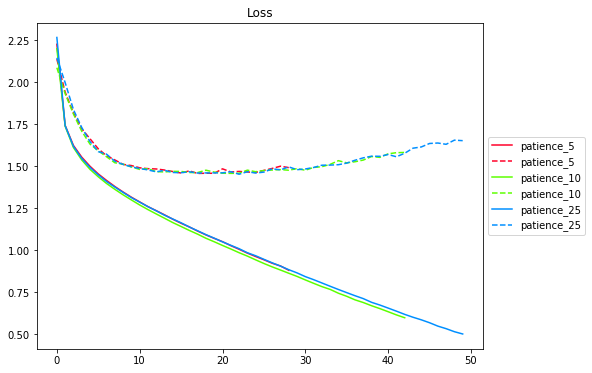

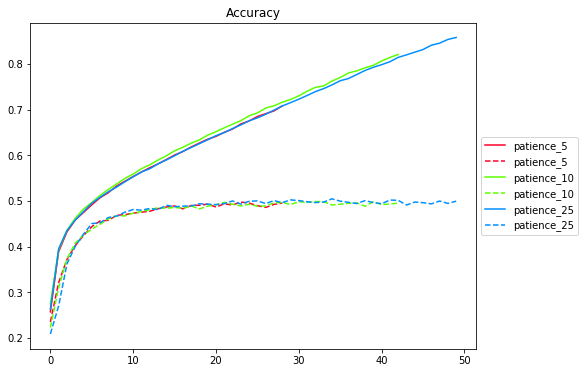

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()